# MIS HW3 - Group 18
---
***Group members - Prathmesh Savale (ps33296), Vivek Dhulipalla (vd6543), Juwon Lee (jl73492), Anthony Moreno (am83596)***

In [2]:
# importing required libraries
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
import matplotlib.pyplot as plt

## 1. Read in data

In [3]:
# the data is tab separated, so we use \t to read the gold and labels txt files
gold = pd.read_csv('gold.txt', sep='\t', names=['url', 'category'])
# gold.columns = ['url', 'category']
gold.head(3), gold.shape

(                         url category
 0  http://0800-horoscope.com        G
 1         http://18games.net        X
 2       http://1pixelout.net        G,
 (1517, 2))

In [4]:
labels = pd.read_csv('labels.txt', sep='\t', names=['turk', 'url', 'category'])
# labels.columns = ['turk', 'url', 'category']
labels.head(3), labels.shape

(             turk            url category
 0  A1OT3A29R9N1DG  http://000.cc        P
 1  A1PXXEOGQ76RNJ  http://000.cc        G
 2  A1PXXEOGQ76RNJ  http://000.cc        G,
 (92721, 3))

## 2. Split into two DataFrames

In [5]:
labels_on_gold = labels[labels['url'].isin(gold['url'].tolist())]
labels_unknown = labels[np.logical_not(labels['url'].isin(gold['url'].tolist()))]
# confirming if the data is split correctly
labels_on_gold.shape, labels_unknown.shape, labels.shape, labels_on_gold.shape[0]+ labels_unknown.shape[0]

((3324, 3), (89397, 3), (92721, 3), 92721)

In [6]:
# checking labels on gold df
labels_on_gold.head(5)

,turk,url,category
245,A1253FXHCZ9CWM,http://0800-horoscope.com,G
246,A153PKAL7OAY36,http://0800-horoscope.com,G
247,A1FV9SAPL5C6KY,http://0800-horoscope.com,G
248,A1JTOT0DWM6QGL,http://0800-horoscope.com,G
249,A1PXXEOGQ76RNJ,http://0800-horoscope.com,G


In [7]:
# checking labels unknown df
labels_unknown.head(5)

,turk,url,category
0,A1OT3A29R9N1DG,http://000.cc,P
1,A1PXXEOGQ76RNJ,http://000.cc,G
2,A1PXXEOGQ76RNJ,http://000.cc,G
3,A21US576U8SCO4,http://000.cc,G
4,A2LGX47NN7C5D3,http://000.cc,G


## 3. Compute accuracies of turks

In [8]:
# merging gold df with labels on gold to get labels turk and label
merged_w_gold_label = labels_on_gold.merge(gold, left_on=['url'], right_on=['url'], how='left', \
                                           suffixes=('_gold', '_turk_label'))

In [9]:
# getting the gold matches
merged_w_gold_label_correct = merged_w_gold_label[merged_w_gold_label['category_gold'] == \
                                                  merged_w_gold_label['category_turk_label']]

In [10]:
# getting count of categories
total_correct_agg = merged_w_gold_label_correct[['turk','category_gold']].groupby('turk').agg('count')
total_correct_agg.columns = ['category']
total_agg = labels_on_gold[['turk', 'category']].groupby('turk').agg('count')

In [11]:
# calculating ratio
ratio = total_correct_agg / total_agg

In [12]:
# calculating average correctness
rater_goodness = ratio.reset_index().merge(total_agg.reset_index(), on=['turk'])
rater_goodness.index = rater_goodness['turk']
rater_goodness = rater_goodness[['category_x', 'category_y']]
rater_goodness.columns = ['average_correctness', 'total_ratings']
rater_goodness.sort_values('total_ratings', ascending=False)[:10]

,average_correctness,total_ratings
turk,,
A31OCN4MNHUQ6W,0.777174,184
A153PKAL7OAY36,0.722973,148
A2BTR0GQ5B5JI6,0.523810,126
ATVALOQVDCMZW,0.854369,103
AZSDW7JJL5VA7,0.680000,100
A3GE97GX3OXJTW,0.658824,85
A3JMQDTEKRE5X6,0.675000,80
A2JP3HEL3J25AJ,0.687500,80
A3MA9V9UPGCOK7,0.774648,71


## 4. Odds ratios

In [13]:
# calculating odds ratio function
def odds_ratio(val):
    '''takes 1 value as input, returns the odd ratio for that value'''
    return (val/(1.001 - val))

In [14]:
# getting odds ratio for total ratings
rater_goodness['odds'] = rater_goodness['average_correctness'].map(odds_ratio)
rater_goodness.sort_values('total_ratings', ascending=False)[:10]

,average_correctness,total_ratings,odds
turk,,,
A31OCN4MNHUQ6W,0.777174,184,3.472222
A153PKAL7OAY36,0.722973,148,2.600369
A2BTR0GQ5B5JI6,0.523810,126,1.097695
ATVALOQVDCMZW,0.854369,103,5.826657
AZSDW7JJL5VA7,0.680000,100,2.118380
A3GE97GX3OXJTW,0.658824,85,1.925391
A3JMQDTEKRE5X6,0.675000,80,2.070552
A2JP3HEL3J25AJ,0.687500,80,2.192982
A3MA9V9UPGCOK7,0.774648,71,3.422313


## 5. Most accurate turks

In [15]:
# getting the most accurate turks, these are ones who have the maximum odds ratio
rater_goodness[rater_goodness['total_ratings'] >= 20].sort_values(by = "average_correctness", ascending=False)[:10]

,average_correctness,total_ratings,odds
turk,,,
A2U0R4X38GUKZE,0.950000,20,18.627451
A22C0PJUBFJTI0,0.916667,36,10.869565
A23YQUBXZPKILZ,0.875000,24,6.944444
ATVALOQVDCMZW,0.854369,103,5.826657
A1HIXWH4OXT8S4,0.825000,40,4.687500
A3220HG1O83HQ4,0.818182,22,4.475385
A32W20KGQXS0LL,0.800000,25,3.980100
A20PWAB7G3HDHU,0.800000,20,3.980100
AJSJVK40F5HM6,0.785714,28,3.649635


## 6. Rating counts versus accuracy

In [16]:
# replacing nans with zero as these will cause problems while taking product or calculating pearson correlation coefficient
rater_goodness = rater_goodness.replace(np.nan, 0)

Text(0.5, 0, 'Average Correctness')

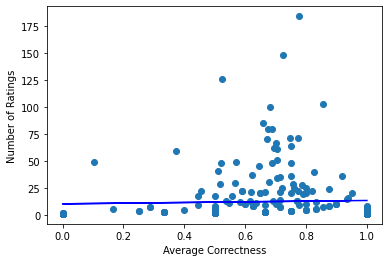

In [17]:
# plotting a scatter plot, and then adding a linear model line to the plot shows us that the trend is completely flat.
# this shows that there is no relation between average correctness annd total ratings
slope, intercept = np.polyfit(rater_goodness['average_correctness'],  rater_goodness['total_ratings'], 1)
# Create a list of values in the best fit line
abline_values = [slope * i + intercept for i in rater_goodness['average_correctness']]

plt.scatter(rater_goodness['average_correctness'], rater_goodness['total_ratings'])
plt.plot(rater_goodness['average_correctness'], abline_values, 'b')
plt.ylabel("Number of Ratings")
plt.xlabel("Average Correctness")

In [18]:
# based on the extremely low pearson correlation coefficient and its big p-value it is difficult to establish 
# any relationship between average correctness and total number of ratings 
st.pearsonr(rater_goodness['average_correctness'], rater_goodness['total_ratings'])

(0.04529238280484698, 0.4594391196967217)

In [19]:
# OLS also doesnt show any relation between average correctness and total ratings. The coefficient is close to 0 and p-value is
# not significant
y = rater_goodness['average_correctness']
X = rater_goodness['total_ratings']
X = sm.add_constant(X)

lm = sm.OLS(y,X)
result = lm.fit()
print(result.summary())

                             OLS Regression Results                            
Dep. Variable:     average_correctness   R-squared:                       0.002
Model:                             OLS   Adj. R-squared:                 -0.002
Method:                  Least Squares   F-statistic:                    0.5488
Date:                 Wed, 03 Aug 2022   Prob (F-statistic):              0.459
Time:                         00:35:10   Log-Likelihood:                -94.663
No. Observations:                  269   AIC:                             193.3
Df Residuals:                      267   BIC:                             200.5
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6431      0.024 

## 7. Overall predicted odds

In [20]:
# geting the top 25% turks
turks_greater_than75 = rater_goodness.reset_index()[rater_goodness.reset_index()['total_ratings'].rank(pct=True) > 0.75]

In [21]:
# joining urls not in gold dataset with rater goodness dataset to get the odds ratio
overall_odds = labels_unknown.merge(turks_greater_than75, left_on=['turk'], right_on=['turk'], how='inner')

In [22]:
# getting the product of of odds for a 'url' and 'category'
overall_odds = overall_odds.groupby(['url', 'category'])[['odds']].prod()
# overall_odds.head(10)

In [23]:
overall_odds = overall_odds.rename(columns= {'odds': 'overall_odds'})
overall_odds.head(5)

overall_odds
url                         category              
http://0-101.net            G             2.155963
http://000.cc               G             1.460583
http://0000.jp              G            14.488244
http://000relationships.com G             9.914590
                            P             1.851852

## 8. Predicted categories

In [24]:
# getting max value for a group
result_75 = overall_odds.sort_values('overall_odds').groupby(level=0).tail(1).sort_values('url')

In [25]:
# creating the result_75 frame
result_75 = result_75.reset_index()
result_75.columns = ['url', 'top_category', 'top_odds']
result_75.index = result_75['url']
result_75 = result_75.drop('url', axis=1)
result_75

,top_category,top_odds
url,,
http://0-101.net,G,2.155963
http://000.cc,G,1.460583
http://0000.jp,G,14.488244
http://000relationships.com,G,9.914590
http://000vitamins.com,G,3.784982
...,...,...
http://zwinky.com,G,16.141443
http://zylom.com,G,1.735526
http://zynga.com,G,3.704611


## 9. Predicted categories using more turks

In [26]:
# getting the top 75% turks
turks_greater_than25 = rater_goodness.reset_index()[rater_goodness.reset_index()['total_ratings'].rank(pct=True) > 0.25]

In [27]:
# joining urls not in gold dataset with rater goodness dataset to get the odds ratio
overall_odds_25 = labels_unknown.merge(turks_greater_than25, left_on=['turk'], right_on=['turk'], how='inner')

In [28]:
# getting the product of of odds for a 'url' and 'category'
overall_odds_25 = overall_odds_25.groupby(['url', 'category'])[['odds']].prod()

In [29]:
result_25 = overall_odds_25.sort_values('odds').groupby(level=0).tail(1).sort_values('url')

In [30]:
result_25 = result_25.reset_index()
result_25.columns = ['url', 'top_category', 'top_odds']
result_25.index = result_25['url']
result_25 = result_25.drop('url', axis=1)
result_25.head(5)

,top_category,top_odds
url,,
http://0-101.net,G,2.155963e+00
http://000.cc,G,2.181050e+03
http://0000.jp,G,2.877556e+07
http://000relationships.com,P,1.851852e+00
http://000vitamins.com,G,5.014149e+00


In [31]:
result_25

,top_category,top_odds
url,,
http://0-101.net,G,2.155963e+00
http://000.cc,G,2.181050e+03
http://0000.jp,G,2.877556e+07
http://000relationships.com,P,1.851852e+00
http://000vitamins.com,G,5.014149e+00
...,...,...
http://zwinky.com,P,1.000000e+03
http://zylom.com,G,2.873345e+03
http://zynga.com,G,5.442125e+01


In [32]:
overall_odds_merged = result_75.merge(result_25, left_index=True, right_index=True, suffixes=['_75', '_25'])

In [33]:
# creating crosstab for predictions, this shows the total number of URLs of baseline vs. predicted
pd.crosstab(overall_odds_merged["top_category_75"], overall_odds_merged["top_category_25"])

top_category_25,G,P,R,X
top_category_75,,,,
G,8328,562,175,202
P,181,335,53,15
R,21,35,130,27
X,34,9,29,474


In [34]:
# creating crosstab for predictions, this shows the error of baseline vs. predicted
pd.crosstab(overall_odds_merged["top_category_75"], overall_odds_merged["top_category_25"], normalize='index')
# most mistakes happen while predicting P because it has the lowest value (accuracy) in this crosstab

top_category_25,G,P,R,X
top_category_75,,,,
G,0.898673,0.060645,0.018884,0.021798
P,0.309932,0.573630,0.090753,0.025685
R,0.098592,0.164319,0.610329,0.126761
X,0.062271,0.016484,0.053114,0.868132
